## - 불러올 패키지 목록

In [1]:
# 수학 함수 패키지
import math

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.weightstats import *
from statsmodels.formula.api import *

# SciPy 패키지
import scipy.stats as spst  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# 통계적 추정과 검정

## 통계적 추정

### 모평균에 대한 추정

In [2]:
df_csi = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\Csi.csv' )
df_csi.head(5)

,ID,Index
0,1,75
1,2,63
2,3,49
3,4,86
4,5,53


count    25.00
mean     72.32
std      11.60
min      49.00
25%      63.00
50%      74.00
75%      80.00
max      95.00
Name: Index, dtype: float64



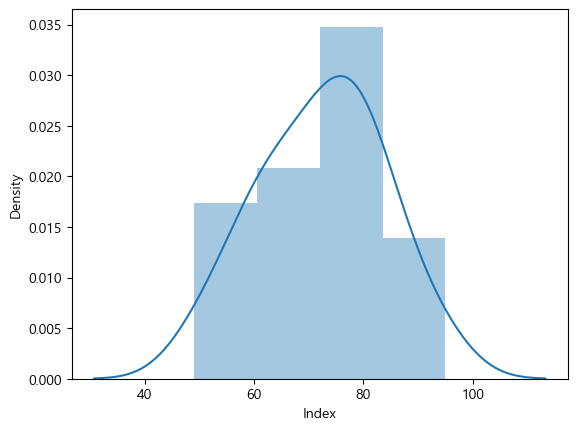

In [3]:
x = df_csi.Index

print( x.describe() )
print()

sb.distplot( x )
plt.show()

#### statsmodels 패키지 사용

- `statsmodels.stats.weightstats.DescrStatsW()` : 변수에 대한 기술통계량, 검정통계량, 모평균에 대한 신뢰구간 등이 저장된 리스트 객체 생성  
https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.DescrStatsW.html

- Method :  
`.tconfint_mean( alpha=0.05, alternative='two-sided' )` https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.DescrStatsW.tconfint_mean.html  
`.zconfint_mean( alpha=0.05, alternative='two-sided' )`  https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.DescrStatsW.zconfint_mean.html

In [4]:
# 신뢰수준 1 - α = 0.95 (즉, 유의수준 α = 0.05) 일 때, 

# 표본 평균
print('표본 평균 : ', DescrStatsW(x).mean )
print()

# 표준 편차
print('표준편차 (df = n 인 경우) : ', DescrStatsW(x).std )
print()
print('표준편차 (df = n-1 인 경우) : ', DescrStatsW(x, ddof = 1).std ) # df = n - ddof
print()

# 신뢰 구간
print( '모평균에 대한 신뢰구간 (모분산이 알려지지 않은 경우) :\n',
       DescrStatsW(x).tconfint_mean() )
print()
print( '모평균에 대한 신뢰구간 (모분산이 알려진 경우) :\n',
       DescrStatsW(x).zconfint_mean() )
print()

표본 평균 :  72.32

표준편차 (df = n 인 경우) :  11.365632406513948

표준편차 (df = n-1 인 경우) :  11.600000000000001

모평균에 대한 신뢰구간 (모분산이 알려지지 않은 경우) :
 (67.53175533702299, 77.108244662977)

모평균에 대한 신뢰구간 (모분산이 알려진 경우) :
 (67.77288355586707, 76.86711644413292)



#### SciPy 패키지 사용
- `scipy.stats.t` https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

- Method : `.ppf()`, `.cdf()`, `.interval()`

In [5]:
# n
n = x.size
print('n =', n )
print()

# 표본평균
mean = np.mean(x)
print('표본 평균 : ', mean )
print()

# 표준편차
print('표준편차 (df = n 인 경우) : ', np.std(x) )
print('표준편차 (df = n-1 인 경우) : ', np.std(x, ddof = 1) )  # df = n - ddof
print()

# 표준오차 계산
sd = np.std(x, ddof=1) / np.sqrt(n)  # df = n - ddof
print('표준오차 (df = n-1 인 경우) : ', sd )  
print()

n = 25

표본 평균 :  72.32

표준편차 (df = n 인 경우) :  11.365632406513948
표준편차 (df = n-1 인 경우) :  11.600000000000001

표준오차 (df = n-1 인 경우) :  2.3200000000000003



In [6]:
# 신뢰구간 구하기(1)

print( '신뢰구간 :',
       spst.t.interval( 1 - 0.05,  # 1 - α
                        n-1,  # df
                        loc = mean,  # 구간의 중심
                        scale = sd) )  # 표준오차
print()

신뢰구간 : (67.53175533702299, 77.108244662977)



In [7]:
# 신뢰구간 구하기(2)

# 상/하한을 계산하여 신뢰구간을 구함.
# α = 0.05 일 때, 좌/우측이 각각 0.025 이므로

limit = spst.t.ppf( 1 - 0.05/2, n-1) * sd  # ( 1 - α, df )

print('limit_upper =', limit )  
print()

limit_lower = spst.t.ppf( 0.05/2, n-1) * sd  # ( α, df )

print('limit_lower =', limit_lower, '(= -limit_upper)' )  
print()

# 신뢰 구간
print('신뢰구간 :', mean - limit,'~', mean + limit)
print()

limit_upper = 4.788244662977008

limit_lower = -4.788244662977009 (= -limit_upper)

신뢰구간 : 67.53175533702299 ~ 77.108244662977



### 모비율에 대한 추정

#### statsmodels 패키지 사용
- `statsmodels.stats.proportion.proportion_confint( count, nobs, alpha=0.05, method='normal' )` https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportion_confint.html#statsmodels.stats.proportion.proportion_confint

##### 모비율에 대한 신뢰구간(이항비율)

In [33]:
n = 400
x = 250

print( "표본비율: p =", x/n )
print()  

# x가 이항분포를 따른다고 가정할 때 : method = 'beta'
print( "모비율에 대한 신뢰구간(이항비율) : ",
       proportion_confint( x, n, alpha = 0.05, method = 'beta') )
print()

표본비율: p = 0.625

모비율에 대한 신뢰구간(이항비율) :  (0.5755217886614281, 0.6726137612704786)



##### 모비율에 대한 신뢰구간(정규근사)

In [32]:
n = 400
x = 250

print( "표본비율: p =", x/n )
print()  

# x가 정규분포를 따른다고 가정할 때 : method = 'normal' (기본값)
print( '모비율에 대한 신뢰구간(정규근사) :',
       proportion_confint( x, n, alpha = 0.05, method = 'normal') )
print()

표본비율: p = 0.625

모비율에 대한 신뢰구간(정규근사) : (0.5775568258044377, 0.6724431741955623)



#### SciPy 패키지 사용
- `scipy.stats.norm` https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

- Method : `.ppf()`, `.interval()`

In [9]:
n = 400
x = 250
p = x/n

print( "표본비율: p =", x/n )
print()
print( '모비율에 대한 신뢰구간(정규분포) :',
       spst.norm.interval( 0.95,  # 1 - α
                           p,
                           scale = np.sqrt( p*(1-p)/n ) ) )  # 표준오차
print()

표본비율: p = 0.625

모비율에 대한 신뢰구간(정규분포) : (0.5775568258044378, 0.6724431741955622)



In [10]:
print( p + spst.norm.ppf(0.025) * np.sqrt( p*(1-p)/n ),
       p + spst.norm.ppf(0.975) * np.sqrt( p*(1-p)/n ) )

0.5775568258044377 0.6724431741955622


### 모분산과 모표준편차에 대한 추정
- `scipy.stats.bayes_mvs( data, alpha=0.9 )`  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html

In [11]:
df_csi = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\Csi.csv' )
x = df_csi.Index

In [12]:
mean_x, var_x, std_x = spst.bayes_mvs( x,
                                       0.95 )  # 1 - α


print( '평균의 신뢰구간 :\n', mean_x)
print()
print( '분산의 신뢰구간 :\n', var_x)
print()
print( '표준편차의 신뢰구간 :\n', std_x)
print()

평균의 신뢰구간 :
 Mean(statistic=72.32, minmax=(67.53175533702299, 77.108244662977))

분산의 신뢰구간 :
 Variance(statistic=146.79272727272726, minmax=(82.04028250979714, 260.41455376108695))

표준편차의 신뢰구간 :
 Std_dev(statistic=11.978951328828686, minmax=(9.057609094556748, 16.137365143079798))



## 단일 모집단에 대한 검정

### 모평균에 대한 검정 (일표본 t-검정)
- `scipy.stats.ttest_1samp( a, popmean, axis=0, nan_policy='propagate', alternative='two-sided' )`  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

- `scipy.stats.t` https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html  
Method : `.ppf()`, `.cdf()`, `.interval()`

In [ ]:
# scipy.stats.ttest_1samp( a,  # 검정을 수행할 대상 (배열)
#                          popmean,  # 귀무가설의 기대값.
#                          axis = 0,  # a 배열에서 검정을 수행할 축 지정. 기본값은 0
#                                     # axis = None 이면 전체 배열을 계산
#                          nan_policy = 'propagate',  # 입력된 데이터에 NaN 값이 포함된 경우의 처리 방법. 기본값은 ‘propagate’
#                                                     # ‘propagate’ : NaN 을 반환한다.
#                                                     # ‘raise’: 에러를 발생시킨다.
#                                                     # ‘omit’: NaN 값을 무시하고 계산 수행
#                          alternative = 'two-sided' )  # 양측/단측 검정 설정. 기본값은 ‘two-sided’
#                                                       # 양측검정은 ‘two-sided’
#                                                       # 단측검정은 ‘less’ 또는 ‘greater’

In [14]:
df_csi = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\Csi.csv' )
x = df_csi.Index

In [16]:
# n
n = x.size
print('n =', n )
print()

# 표본평균
mean = np.mean(x)
print('표본 평균 : ', mean )
print()

# 표준편차
print('표준편차 (df = n 인 경우) : ', np.std(x) )
print('표준편차 (df = n-1 인 경우) : ', np.std(x, ddof = 1) )  # df = n - ddof
print()

# 표준오차 계산
sd = np.std(x, ddof=1) / np.sqrt(n)  # df = n - ddof
print('표준오차 (df = n-1 인 경우) : ', sd )  
print()

n = 25

표본 평균 :  72.32

표준편차 (df = n 인 경우) :  11.365632406513948
표준편차 (df = n-1 인 경우) :  11.600000000000001

표준오차 (df = n-1 인 경우) :  2.3200000000000003



In [22]:
# 일표본 t-검정 (우측 단측검정)
# 대립가설은 '모평균이 70 이상이다' 이므로 우측 단측검정 수행
stat, pval = spst.ttest_1samp( x, popmean = 70,
                               alternative = 'greater')  # 우측 단측검정

print( '검정통계량 :', stat )
print()
print( '기각치 :', spst.t.ppf(0.95, n-1) )  # 0.975 = 1 - α
print()                                      # α = 0.05 일 때, 좌/우측이 각각 0.025 이므로 
print( 'p-value :', pval )
print()

검정통계량 : 0.9999999999999971

기각치 : 1.7108820799094275

p-value : 0.16364344063989328



In [19]:
# 일표본 t-검정 (양측 검정일 경우)
# α = 0.05
stat, pval = spst.ttest_1samp( x, popmean = 70 )  # 양측 검정

print( '검정통계량 :', stat )
print()
print( '기각치 :', spst.t.ppf(0.975, n-1) )  # 0.95 = 1 - α/2
print()
print( 'p-value :', pval )
print()

검정통계량 : 0.9999999999999971

기각치 : 2.0638985616280205

p-value : 0.32728688127978656



### 모비율에 대한 검정

#### 이항비율 검정
- `scipy.stats.binom_test`  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom_test.html

In [29]:
n = 400
x = 54

print('모비율 추정치 =', x/n )  # 모비율 추정치
print()
print( 'p-value =', spst.binom_test( x, n = 400, p = 0.15, alternative = 'less') )
print()

모비율 추정치 = 0.135

p-value = 0.22258067686473576



#### 정규근사 검정

- `statsmodels.stats.proportion.proportions_ztest( count, nobs, value=None, alternative='two-sided', prop_var=False )`  https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html 

- `scipy.stats.norm` https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html  
 Method : `.ppf()`, `.interval()`

In [30]:
# α = 0.05
n = 400
x = 54

# 정규근사 검정
stat, pval = proportions_ztest( x, n, value = 0.15,
                                prop_var = 0.15,
                               alternative = 'smaller')

print( '검정통계량 :', stat )
print()
print( '기각치 :', spst.norm.ppf(0.05) )
print()
print( 'p-value :', pval )
print()

검정통계량 : -0.840168050416805

기각치 : -1.6448536269514729

p-value : 0.20040708469146745



### 모분산에 대한 검정

- `scipy.stats.chi2` https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html  

- Method : `.ppf()`, `.cdf()`, `.interval()`

In [34]:
imp = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\Impurities.csv')
imp.head()

,ID,Volume
0,1,3.6
1,2,3.4
2,3,3.6
3,4,3.7
4,5,3.3


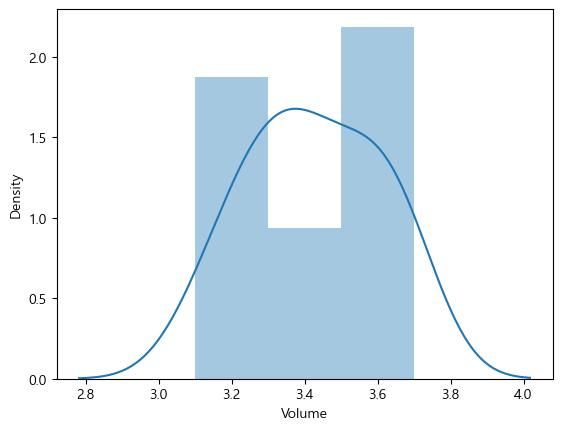

In [35]:
data = imp.Volume

sb.distplot(data)
plt.show()

In [36]:
# 표본 크기
n = data.size

# 귀무가설 하에서의 분산
sigmas2 = 0.09  

# 표본분산
s2 = np.var(data, ddof = 1)

# 카이제곱 검정통계량
Chi2 = (n-1)*s2 / sigmas2

# 모분산에 대한 검정
stat, pval = proportions_ztest( x, n, value = 0.15,
                                prop_var = 0.15,
                                alternative = 'larger')

print( '검정통계량 :', (n-1)*s2 / sigmas2 )
print()
print( '기각치 :', spst.chi2.ppf(0.05, n-1) )
print()
print( 'p-value :', spst.chi2.cdf(Chi2, n-1) )  # 단측 검정의 p-value = P( X < Chi2 )
print()

검정통계량 : 5.66666666666667

기각치 : 7.2609439276700325

p-value : 0.015180452235944669



# 두 모집단에 대한 비교

In [37]:
df_reading = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\Reading.csv',
                          index_col = 'ID')
df_reading

,Group,Score
ID,,
1,New,75
2,New,80
3,New,72
4,New,77
5,New,69
6,New,81
7,New,71
8,New,78
9,Old,65


In [38]:
x = df_reading.Group
y = df_reading.Score

           Score
count  16.000000
mean   72.250000
std     5.208967
min    63.000000
25%    68.750000
50%    71.500000
75%    76.250000
max    81.000000 

        Group
count     16
unique     2
top      New
freq       8


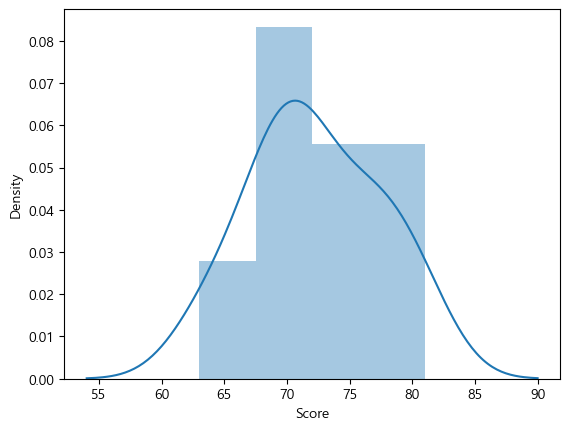

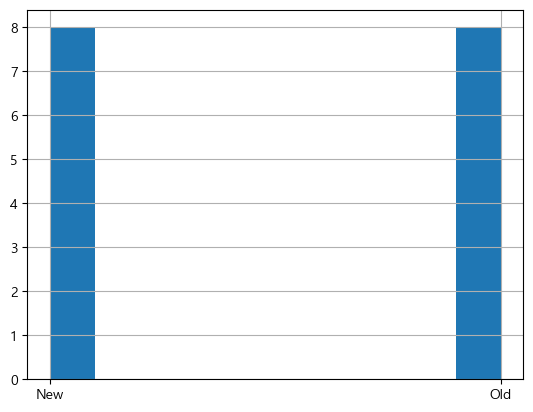

In [39]:
print( df_reading.describe(), '\n\n',
       df_reading.describe( exclude = 'number' ) )

sb.distplot(df_reading.Score)
plt.show()
df_reading['Group'].hist()
plt.show()

      Score                                                  
      count    mean       std   min    25%   50%    75%   max
Group                                                        
New     8.0  75.375  4.373214  69.0  71.75  76.0  78.50  81.0
Old     8.0  69.125  4.086126  63.0  67.25  69.0  71.25  76.0



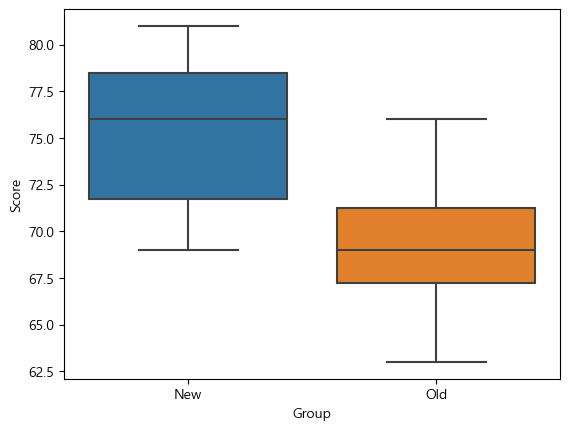

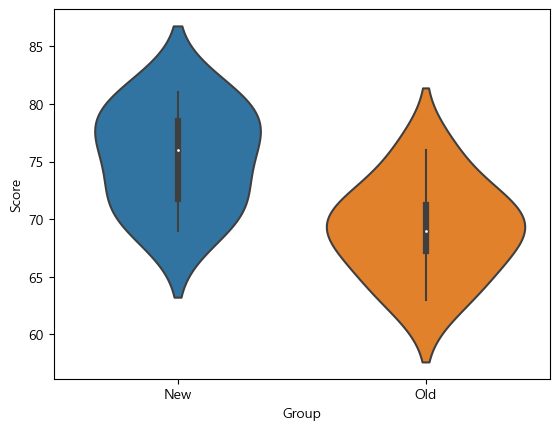

In [42]:
print( df_reading.groupby('Group').describe() )
print()

sb.boxplot( x, y )
plt.show()
sb.violinplot( x, y )
plt.show()

In [41]:
# 그룹 나누기
new = df_reading[ df_reading.Group == 'New' ]
old = df_reading[ df_reading.Group == 'Old' ]

## 독립표본에 의한 두 모평균의 비교 : 독립표본 t-검정

### statsmodels 패키지 사용
- `statsmodels.stats.weightstats.ttest_ind( x1, x2, alternative='two-sided', usevar='pooled', weights=(None, None), value=0 )`  https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ttest_ind.html

In [62]:
# 독립표본 t-검정 (양측 검정)

stat, pval, df = ttest_ind( new.Score, old.Score,
                            alternative = 'two-sided',
                            usevar = 'pooled' )  # 등분산 가정(두 모집단이 같다는 가정)

print( '검정통계량 :', stat )
print()
print( 'p-value :', pval )
print()
print( 'Degree of Freedom :', df )
print()

검정통계량 : 2.9536127902039953

p-value : 0.010470744188033123

Degree of Freedom : 14.0



In [58]:
# 독립표본 t-검정 (좌측 단측검정)

ttest_ind( new.Score, old.Score,
           alternative = 'smaller',
           usevar = 'pooled' )  # 등분산 가정(두 모집단이 같다는 가정)

(2.9536127902039953, 0.9947646279059834, 14.0)

In [53]:
# 독립표본 t-검정 (우측 단측검정)

ttest_ind( new.Score, old.Score,
           alternative = 'larger',
           usevar = 'unequal' )  # 이분산 가정(두 모집단이 다르다는 가정)

(2.9536127902039953, 0.005256688626975243, 13.935945095796395)

### SciPy 패키지 사용
- `scipy.stats.ttest_ind( a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0 )`  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [43]:
# 독립표본 t-검정 (양측 검정)

spst.ttest_ind( new.Score, old.Score,
                equal_var = True )  # 등분산 가정(두 모집단이 같다는 가정)

Ttest_indResult(statistic=2.9536127902039953, pvalue=0.010470744188033123)

In [44]:
# 독립표본 t-검정 (좌측 단측검정)
spst.ttest_ind( new.Score, old.Score,
                alternative = 'less',
                equal_var = True )  # 등분산 가정(두 모집단이 같다는 가정)

Ttest_indResult(statistic=2.9536127902039953, pvalue=0.9947646279059834)

In [59]:
# 독립표본 t-검정 (우측 단측검정)
spst.ttest_ind( new.Score, old.Score,
                alternative = 'greater',
                equal_var = False )  # 이분산 가정(두 모집단이 다르다는 가정)

Ttest_indResult(statistic=2.9536127902039953, pvalue=0.005256688626975245)

In [18]:
# SciPy 패키지
import scipy.stats as spst  # 통계 분석을 위한 패키지

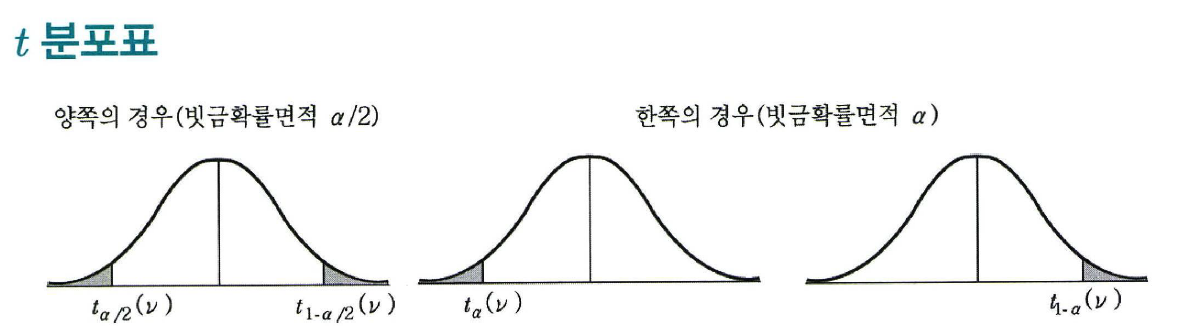

In [20]:
# 규준화식
spst.t.ppf( 1 - 0.05/2, 24)

2.0638985616280205

In [21]:
spst.t.ppf( 0.05/2, 24)

-2.063898561628021

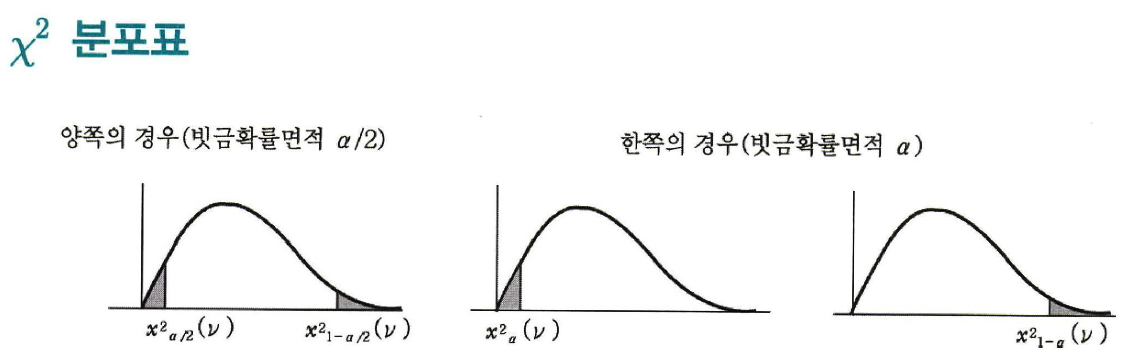

In [22]:
# 규준화식
spst.t.ppf( 1-0.05, 24)

1.7108820799094275

In [23]:
spst.t.ppf( 0.05, 24)

-1.7108820799094282